In [10]:
import pandas as pd
data = pd.read_csv('tgdd_product_description_grouped_preprocessed.csv')

In [11]:
data.sample(5)

,name,description
120,/may-tinh-bang/samsung-galaxy-tab-a9,mặt lưng galaxy tab a9 wifi đặc_điểm chú_ý thi...
117,/may-tinh-bang/oppo-pad-air,cảm_nhận hộp oppo pad air máy diện_mạo vuông_v...
27,/dtdd/nokia-215,nokia 215 4 g chất_liệu nhựa kiểu_dáng bền_bỉ ...
45,/dtdd/oppo-reno11-f-5g,thiết_kế điện_thoại tạo_hình vuông_vức hiện_đạ...
50,/dtdd/realme-11-128gb?utm_flashsale=1,realme 11 chú_ý cảm_giác sang_trọng hiện_đại m...


<Axes: >

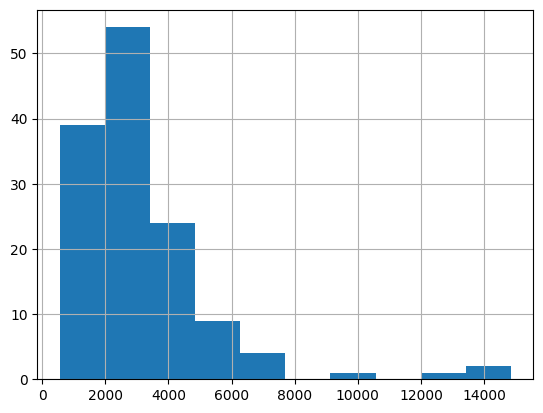

In [12]:
data['description'].str.len().hist()

<Axes: >

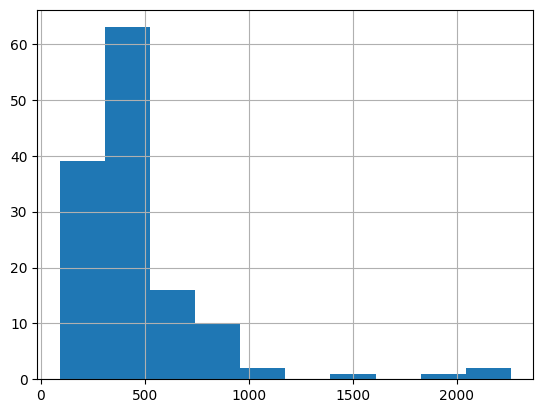

In [13]:
data['description'].str.split().map(lambda x: len(x)).hist()

<Axes: >

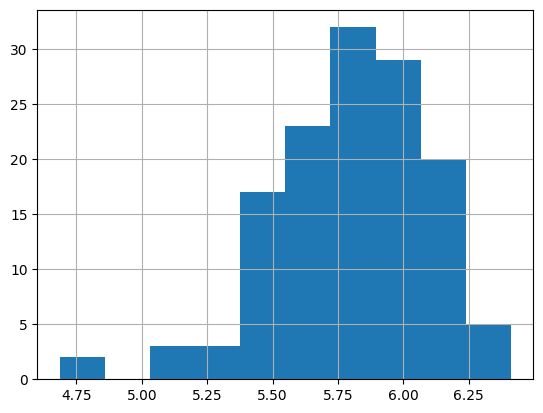

In [16]:
import numpy as np

data['description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

In [42]:
corpus=[]
new= data['description'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

<Axes: >

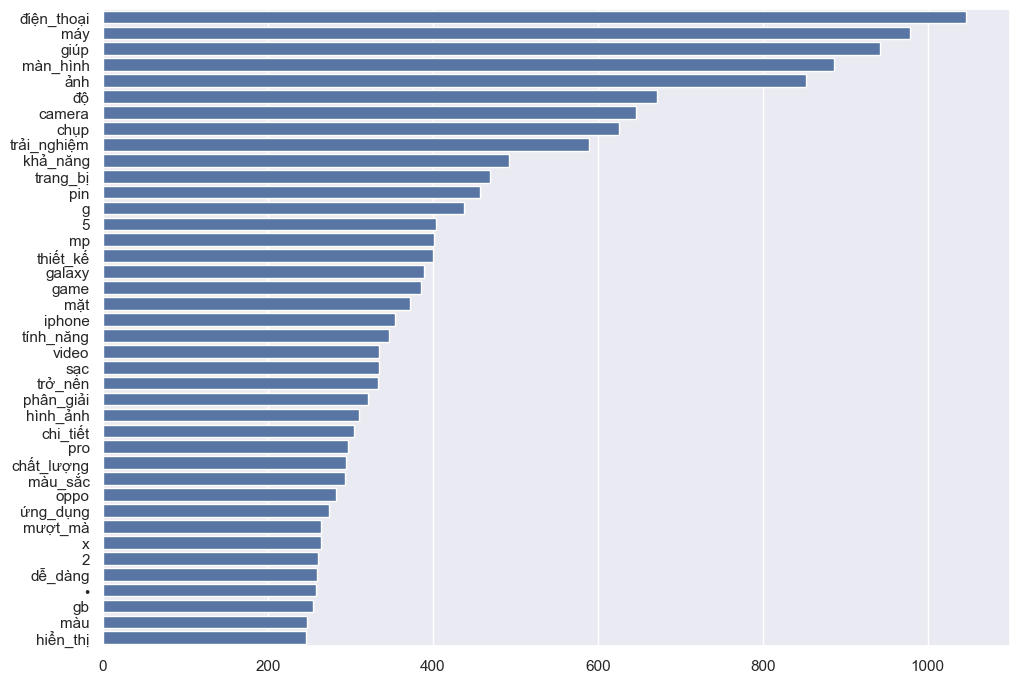

In [43]:
from collections import Counter
import seaborn as sns

counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
        x.append(word)
        y.append(count)

sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=y,y=x)

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<Axes: >

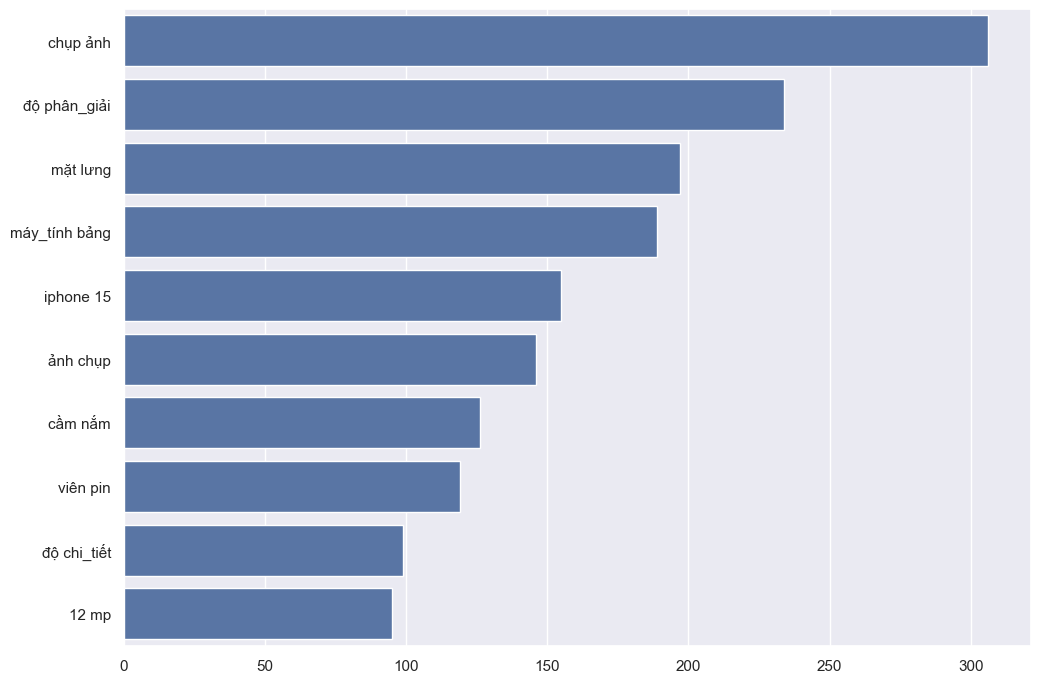

In [45]:
top_n_bigrams=get_top_ngram(data['description'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

<Axes: >

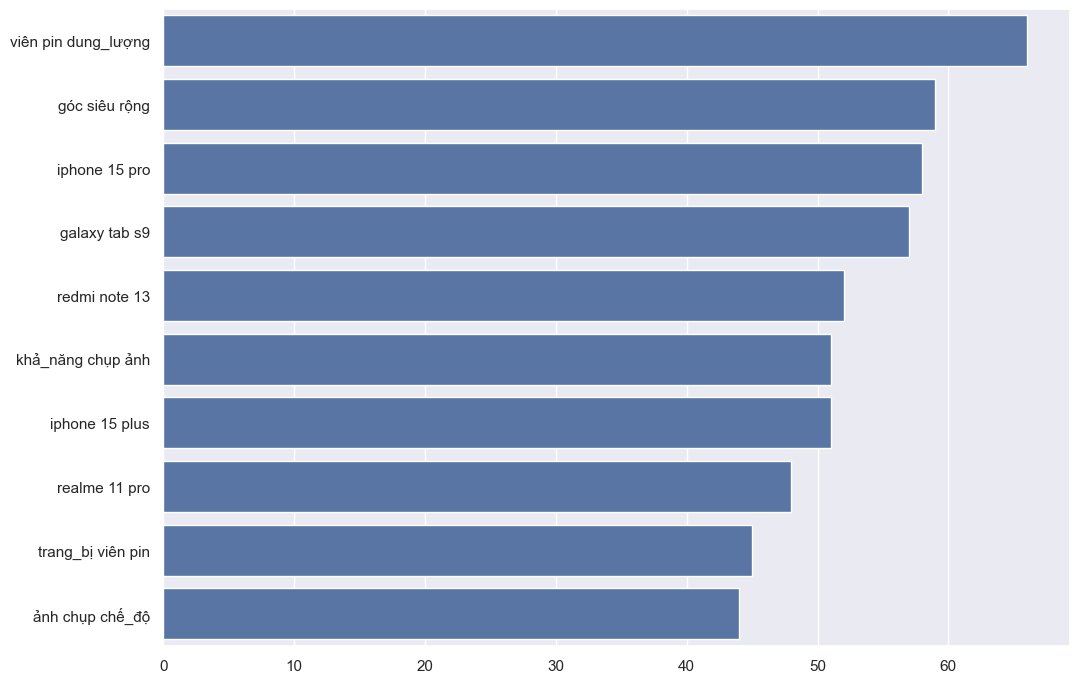

In [46]:
top_tri_grams=get_top_ngram(data['description'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

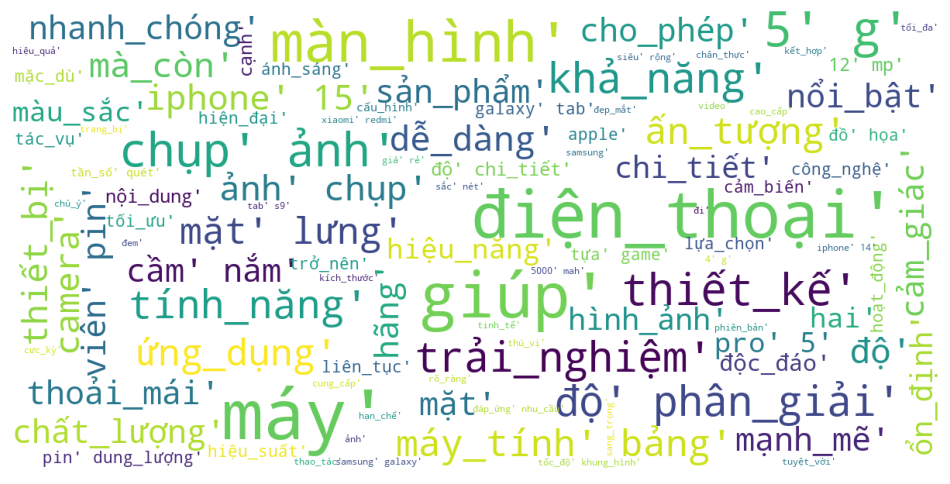

In [48]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)